In [1]:
%matplotlib inline

import pandas
import stumpy
import numpy
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime

path = 'WI3_BusinessIntelligence_Data_Bi3/data_outside_20211017_160006.pkl.csv'
path2 = 'WI3_BusinessIntelligence_Data_Bi3/data_outside_20211018_000100.pkl.csv'
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
dataframe = pandas.read_csv(path, usecols=['magnetometer_x_median', 'magnetometer_y_median', 'magnetometer_z_median', 'Unnamed: 0']) 
dataframe = dataframe.rename(columns={'Unnamed: 0':'timer'})
dataframe = dataframe.set_index(dataframe.timer)
dataframe = dataframe.drop('timer', axis=1)
dataframe

,magnetometer_x_median,magnetometer_y_median,magnetometer_z_median
timer,,,
2021-10-17 16:00:06.000,-32375000.0,-5875000.0,-51687500.0
2021-10-17 16:00:06.050,-32375000.0,-5875000.0,-49750000.0
2021-10-17 16:00:06.100,-32000000.0,-5875000.0,-49781250.0
2021-10-17 16:00:06.150,-32375000.0,-6562500.0,-50562500.0
2021-10-17 16:00:06.200,-31250000.0,-5125000.0,-50187500.0
...,...,...,...
2021-10-17 23:59:05.350,-31812500.0,-4750000.0,-51625000.0
2021-10-17 23:59:05.400,-31812500.0,-4750000.0,-53250000.0
2021-10-17 23:59:05.450,-31437500.0,-4750000.0,-53250000.0


In [3]:
date = dataframe.index[0]
dates = date.split()
date = dates[0]
date

'2021-10-17'

In [4]:
#29 Zyklen lt. Produktionslogfile
dataframe_pattern = dataframe.loc[(dataframe.index >= date+' 18:40:17.450') & (dataframe.index < date+' 18:40:36.050')]
dataframe_pattern

,magnetometer_x_median,magnetometer_y_median,magnetometer_z_median
timer,,,
2021-10-17 18:40:17.450,-34937500.0,-5875000.0,-61187500.0
2021-10-17 18:40:17.500,-34250000.0,-6562500.0,-60375000.0
2021-10-17 18:40:17.550,-33312500.0,-6562500.0,-57312500.0
2021-10-17 18:40:17.600,-33125000.0,-6562500.0,-55312500.0
2021-10-17 18:40:17.650,-33125000.0,-7312500.0,-55750000.0
...,...,...,...
2021-10-17 18:40:35.800,-34937500.0,-6562500.0,-49562500.0
2021-10-17 18:40:35.850,-34625000.0,-6937500.0,-51500000.0
2021-10-17 18:40:35.900,-34937500.0,-6250000.0,-53000000.0


In [5]:
pattern = list(dataframe_pattern.magnetometer_z_median.values)
pattern_len = len(pattern)
pattern_sum = sum(pattern)
pattern_sum

-17995375000.0

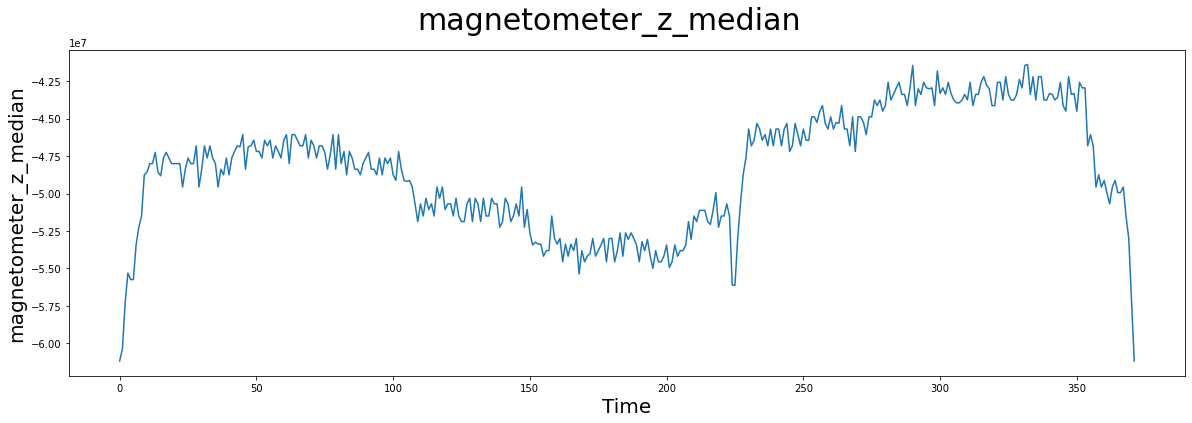

In [6]:
plt.suptitle('magnetometer_z_median', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('magnetometer_z_median', fontsize='20')
plt.plot(dataframe_pattern['magnetometer_z_median'].values)
plt.show()

In [7]:
dataframe_part = dataframe.loc[(dataframe.index >= date+' 18:40:17.450')]
dataframe_part.iloc[0:pattern_len]

,magnetometer_x_median,magnetometer_y_median,magnetometer_z_median
timer,,,
2021-10-17 18:40:17.450,-34937500.0,-5875000.0,-61187500.0
2021-10-17 18:40:17.500,-34250000.0,-6562500.0,-60375000.0
2021-10-17 18:40:17.550,-33312500.0,-6562500.0,-57312500.0
2021-10-17 18:40:17.600,-33125000.0,-6562500.0,-55312500.0
2021-10-17 18:40:17.650,-33125000.0,-7312500.0,-55750000.0
...,...,...,...
2021-10-17 18:40:35.800,-34937500.0,-6562500.0,-49562500.0
2021-10-17 18:40:35.850,-34625000.0,-6937500.0,-51500000.0
2021-10-17 18:40:35.900,-34937500.0,-6250000.0,-53000000.0


In [30]:
dataframe = pandas.read_csv(path, usecols=['magnetometer_x_median', 'magnetometer_y_median', 'magnetometer_z_median', 'Unnamed: 0']) 
dataframe = dataframe.rename(columns={'Unnamed: 0':'timer'})
dataframe_17_part = dataframe.loc[(dataframe.index >= 224422) & (dataframe.index <= 224722+200)]
dataframe_17_part

,timer,magnetometer_x_median,magnetometer_y_median,magnetometer_z_median
224422,2021-10-17 19:07:07.100,-32437500.0,-6562500.0,-42812500.0
224423,2021-10-17 19:07:07.150,-32437500.0,-6062500.0,-42062500.0
224424,2021-10-17 19:07:07.200,-32062500.0,-5875000.0,-42812500.0
224425,2021-10-17 19:07:07.250,-32062500.0,-6562500.0,-43187500.0
224426,2021-10-17 19:07:07.300,-31687500.0,-6250000.0,-44750000.0
...,...,...,...,...
224918,2021-10-17 19:07:31.900,-30937500.0,-6562500.0,-47125000.0
224919,2021-10-17 19:07:31.950,-30937500.0,-5875000.0,-46750000.0
224920,2021-10-17 19:07:32.000,-30937500.0,-5875000.0,-46750000.0
224921,2021-10-17 19:07:32.050,-30562500.0,-6250000.0,-46750000.0


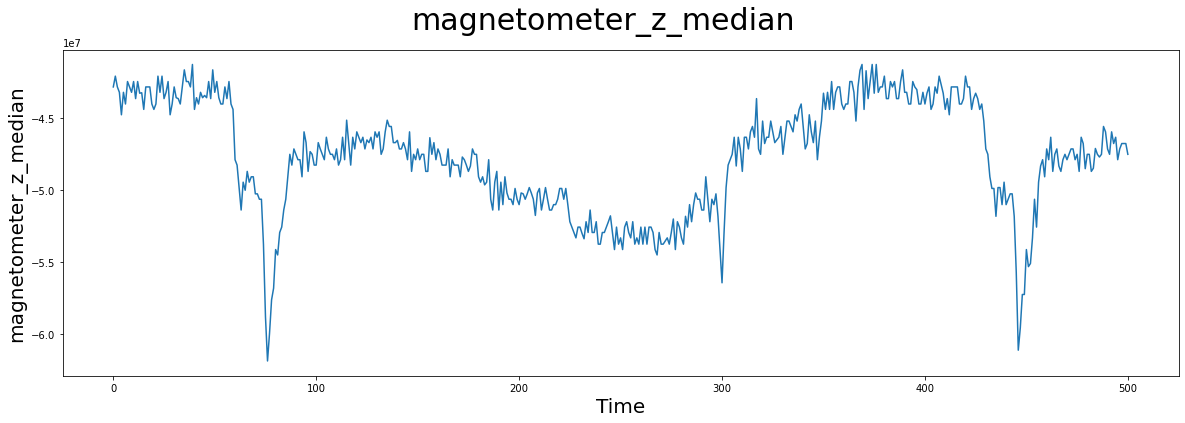

In [31]:
plt.suptitle('magnetometer_z_median', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('magnetometer_z_median', fontsize='20')
plt.plot(dataframe_17_part['magnetometer_z_median'].values)
plt.show()

In [20]:
dataframe_17 = pandas.read_csv(path2, usecols=['magnetometer_z_median', 'Unnamed: 0']) 
dataframe_17 = dataframe_17.rename(columns={'Unnamed: 0':'timer'})
dataframe_17['cycle'] = None
dataframe_17

,timer,magnetometer_z_median,cycle
0,2021-10-18 00:01:00.000,-52375000.0,None
1,2021-10-18 00:01:00.050,-52000000.0,None
2,2021-10-18 00:01:00.100,-52000000.0,None
3,2021-10-18 00:01:00.150,-52375000.0,None
4,2021-10-18 00:01:00.200,-52000000.0,None
...,...,...,...
1726771,2021-10-18 23:59:58.550,-45000000.0,None
1726772,2021-10-18 23:59:58.600,-45000000.0,None
1726773,2021-10-18 23:59:58.650,-45437500.0,None
1726774,2021-10-18 23:59:58.700,-44187500.0,None


In [21]:
matches = stumpy.match(dataframe_pattern['magnetometer_z_median'], dataframe_17['magnetometer_z_median'])
matches

array([[4.805869298589223, 276105],
       [4.832641233570794, 274988],
       [4.869785653015493, 305520],
       ...,
       [14.50978040829532, 918624],
       [15.19204678132162, 908340],
       [15.519772748250865, 907437]], dtype=object)

In [22]:
len(matches)
#matches[-10:]
#3644 in file -> diff: 23

3667

In [23]:
#inds = numpy.where(matches[0][0] > 10.0)  # get indices where value equals 999
#np.delete(a, inds[0], axis=0)   # delete along first dimension
#nparray = numpy.delete(matches, numpy.where(matches >= 10)[0][0], axis=0)
inds = matches[numpy.all(matches >= 10.0, axis=1), :]
inds
#matches[0][0]
# 3639

array([[12.705710331632385, 905139],
       [14.50978040829532, 918624],
       [15.19204678132162, 908340],
       [15.519772748250865, 907437]], dtype=object)

In [24]:
nparray = matches[matches[:, 0] < 10]
len(nparray)

3663

In [25]:
matches_s = sorted(matches, key=lambda x: x[1])
#matches_s

In [26]:
dataframe_17_part = dataframe_17.loc[(dataframe_17.index >= 253) & (dataframe_17.index <= 625)]
dataframe_17_part

,timer,magnetometer_z_median,cycle
253,2021-10-18 00:01:12.650,-62437500.0,None
254,2021-10-18 00:01:12.700,-60875000.0,None
255,2021-10-18 00:01:12.750,-58062500.0,None
256,2021-10-18 00:01:12.800,-56437500.0,None
257,2021-10-18 00:01:12.850,-56062500.0,None
...,...,...,...
621,2021-10-18 00:01:31.050,-51437500.0,None
622,2021-10-18 00:01:31.100,-54437500.0,None
623,2021-10-18 00:01:31.150,-56875000.0,None
624,2021-10-18 00:01:31.200,-62812500.0,None


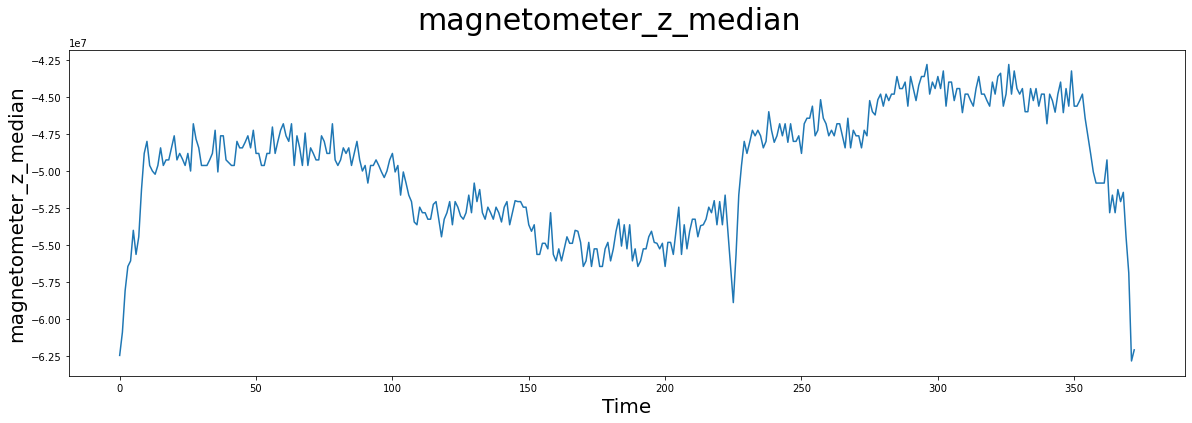

In [27]:
plt.suptitle('magnetometer_z_median', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('magnetometer_z_median', fontsize='20')
plt.plot(dataframe_17_part['magnetometer_z_median'].values)
plt.show()

In [28]:
dataframe_17_part2 = dataframe_17.loc[(dataframe_17.index >= 253-147) & (dataframe_17.index <= 625-147)]
dataframe_17_part2

,timer,magnetometer_z_median,cycle
106,2021-10-18 00:01:05.300,-59625000.0,None
107,2021-10-18 00:01:05.350,-57250000.0,None
108,2021-10-18 00:01:05.400,-51625000.0,None
109,2021-10-18 00:01:05.450,-49250000.0,None
110,2021-10-18 00:01:05.500,-50062500.0,None
...,...,...,...
474,2021-10-18 00:01:23.700,-53625000.0,None
475,2021-10-18 00:01:23.750,-51625000.0,None
476,2021-10-18 00:01:23.800,-54062500.0,None
477,2021-10-18 00:01:23.850,-56437500.0,None


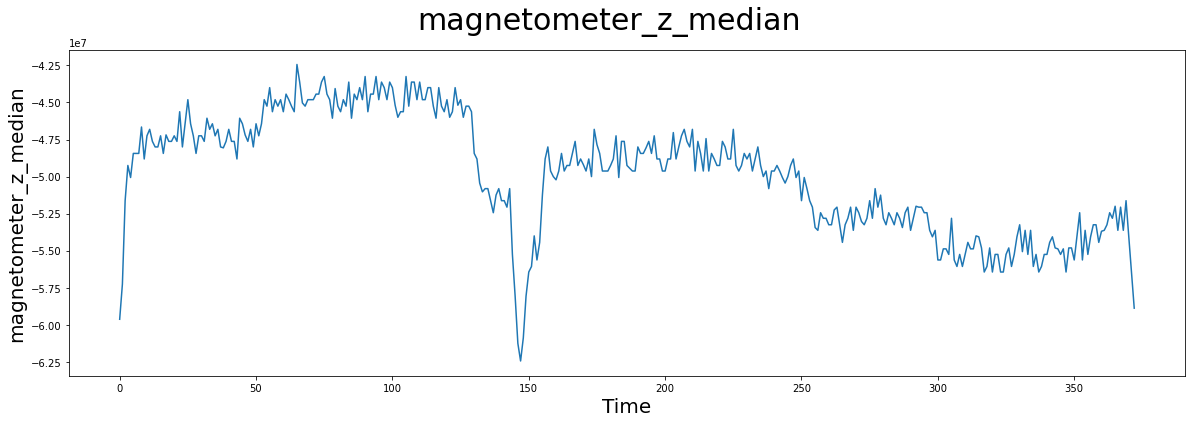

In [29]:
plt.suptitle('magnetometer_z_median', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('magnetometer_z_median', fontsize='20')
plt.plot(dataframe_17_part2['magnetometer_z_median'].values)
plt.show()

In [ ]:
dataframe_17_part_bad = dataframe_17.loc[(dataframe_17.index >= 224722) & (dataframe_17.index <= 224722+400)]
dataframe_17_part_bad

In [ ]:
plt.suptitle('magnetometer_z_median', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('magnetometer_z_median', fontsize='20')
plt.plot(dataframe_17_part_bad['magnetometer_z_median'].values)
plt.show()

In [ ]:
dataframe_18 = pandas.read_csv(path2, usecols=['magnetometer_x_median', 'magnetometer_y_median', 'magnetometer_z_median', 'Unnamed: 0'])
dataframe_18 = dataframe_18.loc[(dataframe_18.index >= 178484-300) & (dataframe_18.index <= 178484+400)]
plt.suptitle('magnetometer_z_median', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('magnetometer_z_median', fontsize='20')
plt.plot(dataframe_18['magnetometer_z_median'].values)
plt.show()

In [ ]:
ref_path = 'WI3_BusinessIntelligence_Data_Bi3/data_inside_20211016_000100.pkl.csv'
